In [1]:
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
#device = torch.device("cuda" if torch.cuda.is_available)

In [3]:
input_size = 784
hidden_layer = 100
num_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True,
                transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False,
                transform=transforms.ToTensor(), download=False)

In [5]:
#train_dataset = torchvision.datasets.CIFAR10(root="./datacifar", train=True,
 #               transform=transforms, download=True)
#test_dataset = torchvision.datasets.CIFAR10(root="./datacifar", train=False,
 #               transform=transforms, download=False)

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [7]:
dataiter = iter(train_loader)
data = next(dataiter)
features, label = data
features.shape, label.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

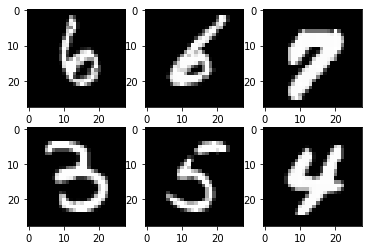

In [8]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(features[i][0], cmap='gray')
#     plt.show()

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.lin1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.lin1(x)
        out = self.relu(out)
        
        out = self.lin2(out)
        return out
    
    
        

In [10]:
#dir(nn)

In [11]:
model = NeuralNet(input_size, hidden_layer, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# training loop
n_total_steps = len(train_loader)
for epochs in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.reshape(-1, 28*28)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"epoch {epochs + 1} / {n_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")
            
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        
        
        outputs = model(images)
        
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    
    acc = 100.0 * (n_correct / n_samples) 
    print(f"accuracy = {acc}")
            

epoch 1 / 2, step 100/600, loss = 0.3844
epoch 1 / 2, step 200/600, loss = 0.3878
epoch 1 / 2, step 300/600, loss = 0.2936
epoch 1 / 2, step 400/600, loss = 0.2339
epoch 1 / 2, step 500/600, loss = 0.1054
epoch 1 / 2, step 600/600, loss = 0.2890
epoch 2 / 2, step 100/600, loss = 0.2210
epoch 2 / 2, step 200/600, loss = 0.3484
epoch 2 / 2, step 300/600, loss = 0.1903
epoch 2 / 2, step 400/600, loss = 0.3105
epoch 2 / 2, step 500/600, loss = 0.1939
epoch 2 / 2, step 600/600, loss = 0.1408
accuracy = 95.39999999999999
